# Сортировка массивов 

Простая сортировка вставкой:

In [1]:
import numpy as np

In [2]:
def selection_sort(x):
    for i in range(len(x)):
        # print(x)
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [3]:
x = np.array([10, 15, 4, 3, 5])

In [4]:
selection_sort(x)

array([ 3,  4,  5, 10, 15])

In [5]:
big = np.random.randint(1, 100, 100)

In [6]:
big

array([50, 43, 21, 39, 99, 18, 36, 80, 61, 66, 47, 19, 38,  4, 71,  3, 88,
        4, 94, 95, 81,  1, 57, 89, 93, 59, 63, 12, 39, 94, 28, 93, 73, 11,
       56, 95,  7, 80, 21, 36, 18, 91, 73, 48,  2, 16, 26, 36, 26, 47,  6,
       68,  9, 42, 48, 78, 30, 55, 14, 98, 76, 65, 31, 51, 56,  2,  6, 62,
       92, 18,  7, 60,  9, 88, 88, 18, 91, 75, 58,  7, 58, 71, 43, 31, 14,
       63, 19, 83, 27, 15, 89, 55, 32, 68, 36, 27, 74, 45, 24, 81])

In [7]:
# %timeit selection_sort(big)

294 µs ± 44.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Случайная сортировка:

In [8]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):        
        np.random.shuffle(x)
    return x

In [9]:
x = np.array([1, 5, 6, 69])
bogosort(x)

array([ 1,  5,  6, 69])

In [10]:
# %timeit bogosort(big)

5.23 µs ± 208 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Оба вида сортировки непригодны из-за резкого уменьшения скорости сортировки при увеличении количества элементов массива.

## Быстрая сортировка в библиотеке NumPy: функции np.sort и np.argsort 

Чтобы получить отсортированную версию входного массива без его изменения, можно использовать функцию np.sort:

In [11]:
x = np.array([2, 1, 4, 3, 5])
print(np.sort(x))
print(x)

[1 2 3 4 5]
[2 1 4 3 5]


Если необходимо отсортировать имеющийся массив, то можно вместо этого применять метод sort массивов:

In [12]:
x.sort()
print(x)

[1 2 3 4 5]


Родственная функция argsort, возвращает индексы отсортированных элементов:

In [13]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


В дальнейшем при желании можно будет использовать для построения(посредством "прихотливой" индексации) отсортированного массива:

In [14]:
x[i]

array([1, 2, 3, 4, 5])

### Сортировка по строкам и столбцам.

In [15]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [16]:
# сортировка всех столбцов массива X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [17]:
# сортировка всех строк:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

###### Все строки или столбцы массива рассматриваются как отдельные массивы, так что любые возможные взаимосвязи между значениями строк или столбцов будут утеряны

## Частичные сортировки: секционирование 

Для нахождения K наименьших значений в массиве можно воспользоватья функцией np.partition. Результат представляет собой новый массив с К наименьшими значениями слева от точки разбиения и остальные значения справа от нее в произвольном порядке:

In [18]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Первые три значения в итоговом массиве - три наименьших значения в нем, а на остальных позициях массива располагаются все прочие значения. Внутри каждой из двух секций элементы располагаются в произвольном порядке.

Аналогично сортировке можно секционировать по произвольной оси многомерного массива:

In [19]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [20]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

Аналогично функции np.argsort, вычисляющей индексы для сортировки, существует функция np.argpartition, вычисляющая индексы для секции.

## Пример: K ближайших соседей

In [21]:
x = rand.rand(10, 2)
x

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

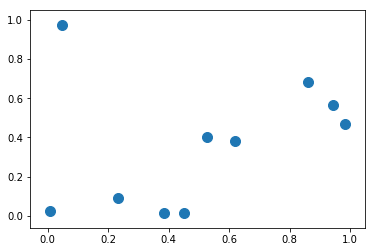

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], s=100);

In [75]:
# вычислим матрицу расстояний с помощью одной строки кода:
dist_sq = np.sum((x[:, np.newaxis, :] - x[np.newaxis, :, :]) ** 2, axis=-1)

Разбиваем операцию выше на более простые операции

In [76]:
# для каждой пары точек вычисляем разности их координат
differences = x[:, np.newaxis, :] - x[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [77]:
# возводим разности координат в квадрат
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [78]:
# суммируем квадраты разностей координат для получения квадрата расстояния

In [79]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [80]:
dist_sq

array([[0.        , 0.40999909, 0.90538547, 0.05550496, 0.50287983,
        1.14976739, 1.15936537, 0.19672877, 1.16632222, 0.14319923],
       [0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
        0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585],
       [0.90538547, 0.55794316, 0.        , 0.81458763, 0.67649219,
        1.13419594, 0.74752753, 1.08562368, 0.9704683 , 1.03211241],
       [0.05550496, 0.18090431, 0.81458763, 0.        , 0.23387834,
        0.70468321, 0.74108843, 0.05338715, 0.72671958, 0.0288717 ],
       [0.50287983, 0.00906581, 0.67649219, 0.23387834, 0.        ,
        0.14021843, 0.1470605 , 0.16449241, 0.13755476, 0.18859392],
       [1.14976739, 0.21465798, 1.13419594, 0.70468321, 0.14021843,
        0.        , 0.06080186, 0.48946337, 0.01100053, 0.56059965],
       [1.15936537, 0.19098635, 0.74752753, 0.74108843, 0.1470605 ,
        0.06080186, 0.        , 0.61258786, 0.02046045, 0.66652228],
       [0.19672877, 0.15497331, 1.0856236

In [81]:
# проверка, что набор расстояний между каждой точкой и ей самой состоит из нулей
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


Выполнив полную сортировку, мы проделали лишнюю работу. Если нас интересовали K ближайших соседей, было достаточно секционировать все строки так, чтобы сначала шли K+1 минимальных квадратов расстояний, а большие расстояния заполняли оставшиеся позиции массива. Сделать это можно с помощью функции np.argpartition:

In [83]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

Чтобы визуализировать эту сетку соседей, выведем на диаграмму точки вдоль линий, связывающих каждую точку с ее ближайшими двумя соседями

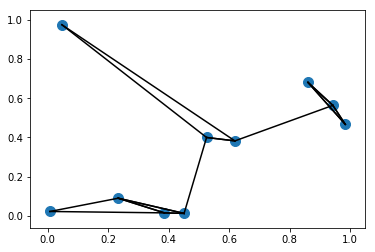

In [86]:
plt.scatter(x[:, 0], x[:, 1], s=100)

# рисуем линии из каждой точки к ее двум ближайшим соседям
K = 2

for i in range(x.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # чертим линию от X[i] до X[j]
        # используем для этого "магическую" функцию zip:
        plt.plot(*zip(x[j], x[i]), color='black')